# TP4 : Ensemble de variables

Le but de ce TP est de mettre en oeuvre visualisations et analyses statistiques d'un ensemble de variables. Comme vu en cours, une première analyse consiste à prendre en compte un ensemble de couples de variables.


## Nuage de points et boxplots
1.  Chargez le dataset iris avec sklearn. Garder que la description des données et donner le nombre d'observations et le nombre de variables. Jetez également un oeil à la description des données.
> utilisez la fonction `load_iris` de scikit-learn

In [1]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)
print(X.shape)
n,p = X.shape

(150, 4)


In [2]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


2. En utilisant la fonction `subplot` de matplotlib, affichez les nuages de points par paires de variables. Mettez des histogrammes sur la diagonale. Quelles variables vous semblent liées ?


> la "case" i,j du subplot est donnée par l'index i*4+j+1


> Il y a beaucoup de manière de plotter avec matplotlib. Pour une référence complète, voir https://github.com/rougier/scientific-visualization-book

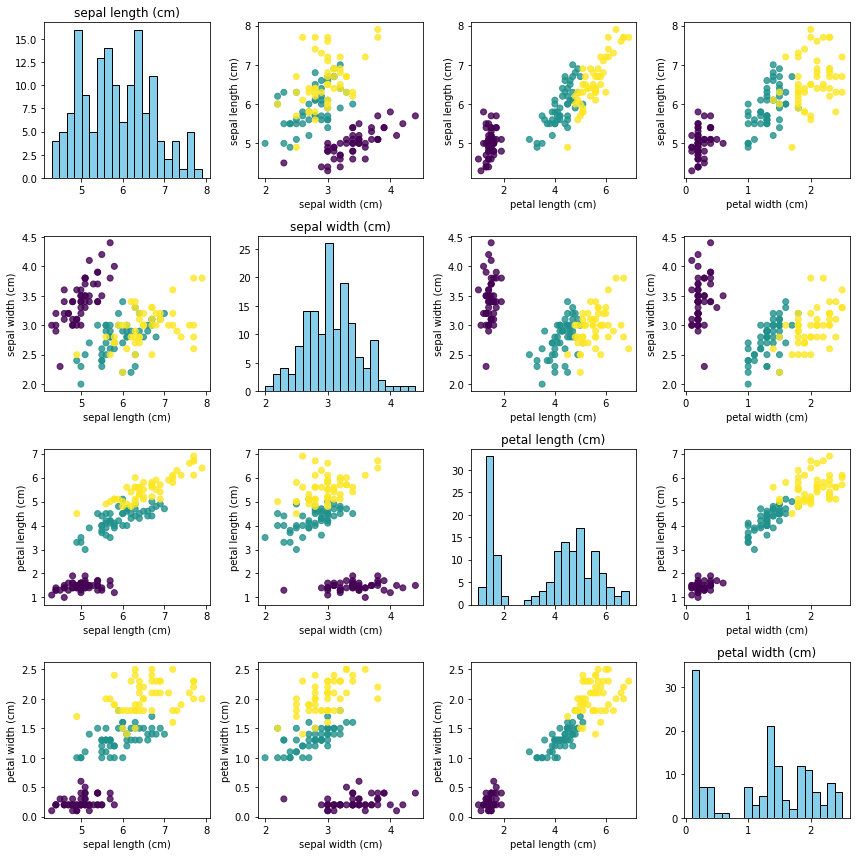

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Charger le jeu de données Iris
X, y = load_iris(return_X_y=True)
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Créer un DataFrame avec les données
df = pd.DataFrame(X, columns=feature_names)

# Définir la taille de la figure
fig = plt.figure(figsize=(12, 12))

# Parcourir les paires de variables et les indices de subplot
for i in range(4):
    for j in range(4):
        # Index du subplot
        index = i * 4 + j + 1

        # Si i et j sont égaux, tracer un histogramme sur la diagonale
        if i == j:
            plt.subplot(4, 4, index)
            plt.hist(df.iloc[:, i], bins=20, color='skyblue', edgecolor='black')
            plt.title(feature_names[i])
        else:
            # Sinon, tracer un nuage de points
            plt.subplot(4, 4, index)
            plt.scatter(df.iloc[:, j], df.iloc[:, i], c=y, cmap='viridis', alpha=0.8)
            plt.xlabel(feature_names[j])
            plt.ylabel(feature_names[i])

# Ajuster l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

## Normalisation des données
3. Calculez la matrice `Xc` correspondant au centrage de la matrice `X`. Vérifiez que vous avez bien une moyenne nulle.
> `np.mean(X,axis=0)` permet de calculer la moyenne pour chaque colonne de `X`


4.  Calculez la matrice `Xr` correspondant aux données `X` centrées et réduites. Vérifiez que vos données sont bien centrées et réduites.
> `np.std(X,axis=0)` permet de calculer l'écart type pour chaque colonne de `X`

5. Faites la même chose avec l'objet `StandardScaler` du module sklearn.preprocessing de scikit-learn.

## Matrices de variance covariance / corrélation

3. Calculez la matrice de variance/covariance de manière matricielle de ce jeu de données.
        

4. Calculez maintenant la matrice de corrélation, toujours de manière matricielle. Est ce que cette matrice confirme votre hypothèse de la question 2 ?

Retour dans le monde réel : que pouvez vous dire de la forme générale des pétales des orchidées ?